In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import metrics
from sklearn.metrics import r2_score 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
#read data for q1
df1=pd.read_csv('Q1.csv')
# df2=pd.read_csv('Q2.csv')
# df3=pd.read_csv('Q3.csv')

### Question 1: Can we classify the crash severity level of an accident based on factors like whether the driver is young or not, or is distracted or not? If there is a correaltion between some variables, what are the factors that most influence the severity of a crash and what model should we use?    
  
### Classification - target variable: MAX_SEVERITY_LEVEL

# Q1 EDA

In [3]:
df1=df1.drop(columns=['Unnamed: 0'])

In [4]:
df1

,MAX_SEVERITY_LEVEL,UNBELTED_OCC_COUNT,ALCOHOL_RELATED,DRUGGED_DRIVER,YOUNG_DRIVER,DISTRACTED,CORE_NETWORK,CRASH_YEAR,MATURE_DRIVER
0,2,0,0,0,0,0,0,2017,0
1,1,0,0,0,0,0,0,2017,0
2,2,0,0,0,0,0,0,2017,0
3,1,0,0,0,0,0,0,2017,0
4,1,0,0,0,0,1,0,2017,0
...,...,...,...,...,...,...,...,...,...
604648,2,0,0,0,0,0,0,2021,1
604649,2,0,0,0,0,0,0,2021,0
604650,1,0,0,0,1,0,1,2021,0
604651,1,0,0,0,0,0,0,2021,0


In [5]:
df1['MAX_SEVERITY_LEVEL'].value_counts()

1    363701
2    216489
3     24463
Name: MAX_SEVERITY_LEVEL, dtype: int64

### We noticed a unbalanced target variable, so we do a downsampling since we have a decent amount of data

In [6]:
# resample(downsample) our data

data=df1
class_counts = data['MAX_SEVERITY_LEVEL'].value_counts()

minority_class_label = class_counts.idxmin()
minority_class_count = class_counts.min()

classes = {label: data[data.MAX_SEVERITY_LEVEL == label] for label in class_counts.index}

downsampled_classes = {
    label: resample(class_df,
                    replace=False,
                    n_samples=minority_class_count,
                    random_state=42)
    for label, class_df in classes.items()
}

downsampled_data = pd.concat(downsampled_classes.values())

df1 = downsampled_data.sample(frac=1, random_state=42).reset_index(drop=True)




In [7]:
df1['MAX_SEVERITY_LEVEL'].value_counts()

3    24463
1    24463
2    24463
Name: MAX_SEVERITY_LEVEL, dtype: int64

# Data preprocess and modeling

In [8]:
df1['CRASH_YEAR'].value_counts()

2019    15199
2018    15031
2021    15017
2017    14899
2020    13243
Name: CRASH_YEAR, dtype: int64

In [9]:
df1['MAX_SEVERITY_LEVEL'].value_counts()

3    24463
1    24463
2    24463
Name: MAX_SEVERITY_LEVEL, dtype: int64

In [10]:
#check null
df1.isnull().sum()

MAX_SEVERITY_LEVEL    0
UNBELTED_OCC_COUNT    0
ALCOHOL_RELATED       0
DRUGGED_DRIVER        0
YOUNG_DRIVER          0
DISTRACTED            0
CORE_NETWORK          0
CRASH_YEAR            0
MATURE_DRIVER         0
dtype: int64

In [11]:
df1.sample(10)

,MAX_SEVERITY_LEVEL,UNBELTED_OCC_COUNT,ALCOHOL_RELATED,DRUGGED_DRIVER,YOUNG_DRIVER,DISTRACTED,CORE_NETWORK,CRASH_YEAR,MATURE_DRIVER
25411,1,0,0,0,0,0,0,2018,0
29657,3,1,0,0,1,0,0,2021,0
30232,3,0,0,0,0,0,0,2018,1
26524,3,2,1,0,0,0,0,2019,0
61673,2,0,0,0,1,0,0,2018,0
23127,3,1,1,1,0,0,0,2021,0
50220,3,0,1,0,0,0,0,2018,0
24085,1,0,0,0,1,0,0,2017,0
45178,2,0,0,0,0,1,0,2021,0
28536,2,0,0,0,0,0,0,2017,0


In [12]:
df1.columns

Index(['MAX_SEVERITY_LEVEL', 'UNBELTED_OCC_COUNT', 'ALCOHOL_RELATED',
       'DRUGGED_DRIVER', 'YOUNG_DRIVER', 'DISTRACTED', 'CORE_NETWORK',
       'CRASH_YEAR', 'MATURE_DRIVER'],
      dtype='object')

### First we want to see the data distribution of each variables and correlation map

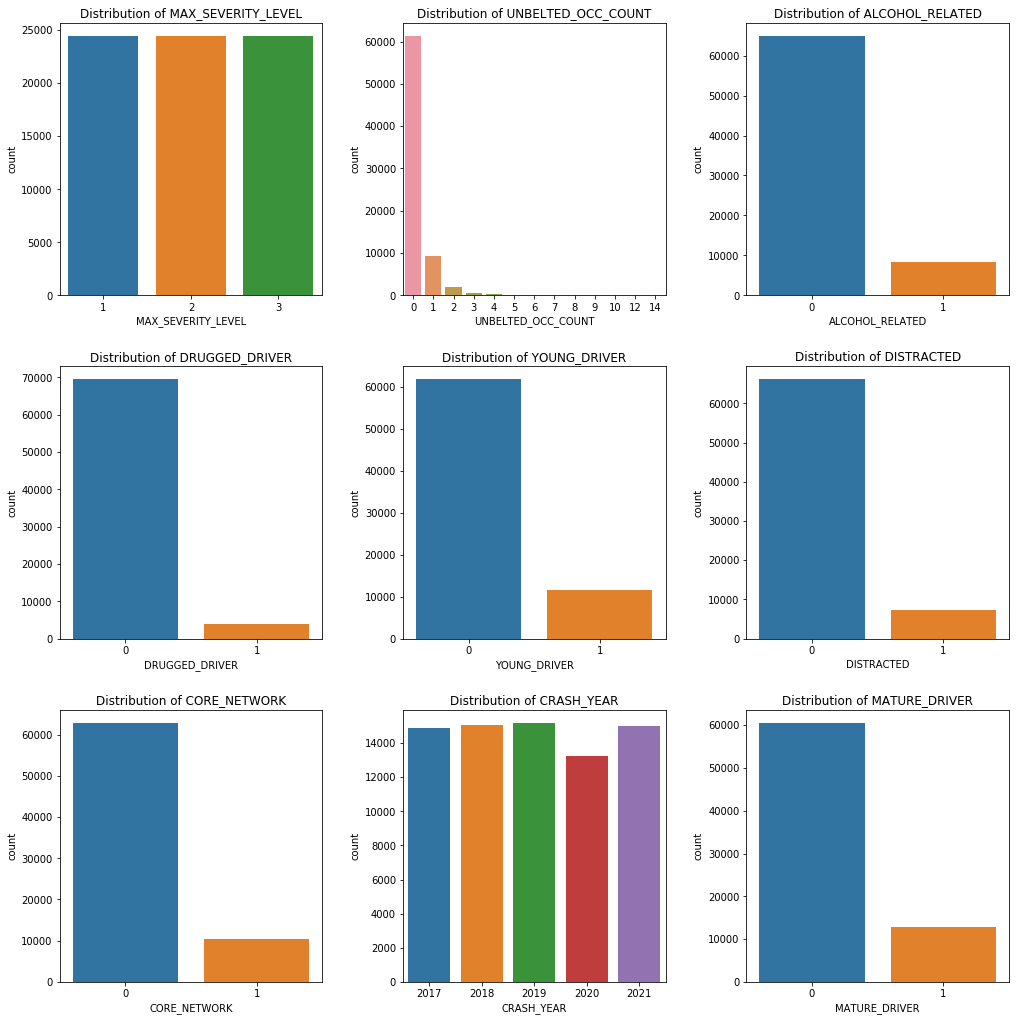

In [13]:
features = ['MAX_SEVERITY_LEVEL', 'UNBELTED_OCC_COUNT', 'ALCOHOL_RELATED', 'DRUGGED_DRIVER', 'YOUNG_DRIVER', 'DISTRACTED', 'CORE_NETWORK', 'CRASH_YEAR', 'MATURE_DRIVER']

# Create a 3x3 grid of plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.tight_layout(pad=5.0)

# Loop through the features and plot the countplot on the corresponding subplot
for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    sns.countplot(data=df1, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.show()

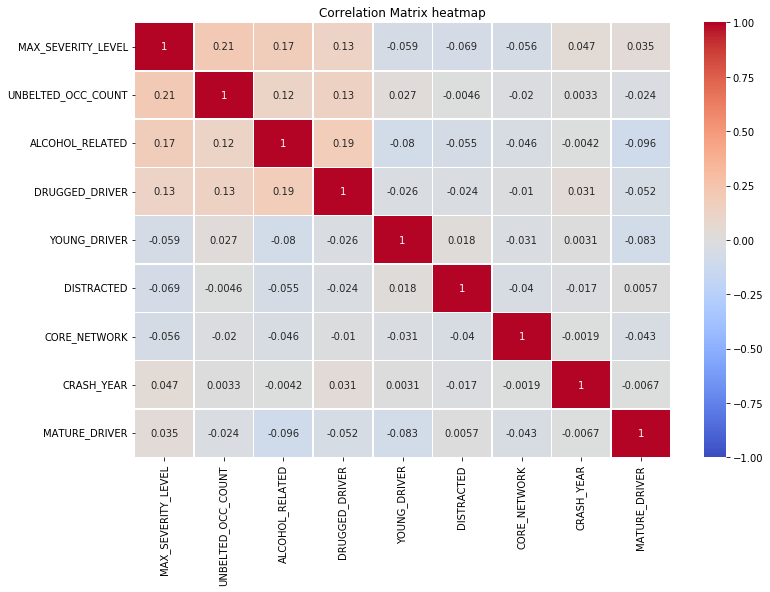

In [14]:
corr_matrix = df1.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Matrix heatmap")
plt.show()

In [15]:
# Create our X and y
X = df1.drop(columns=['MAX_SEVERITY_LEVEL'])
y = df1['MAX_SEVERITY_LEVEL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# We have year as input, so we rescale the data for feature engineering
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and testing data
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [17]:
# we want to first use some classic classification models with default setting to find a baseline model, and meanwhile see the basic performance
models = {
    'LR': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}


In [18]:
# for the three models, print the accuracy and classification report
for model_name, model in models.items():
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'model: {model_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('-' * 80)


model: LR
Accuracy: 0.4361
Classification Report:
              precision    recall  f1-score   support

           1       0.41      0.61      0.49      4866
           2       0.36      0.26      0.30      4919
           3       0.54      0.44      0.49      4893

    accuracy                           0.44     14678
   macro avg       0.44      0.44      0.43     14678
weighted avg       0.44      0.44      0.43     14678

Confusion Matrix:
[[2954 1168  744]
 [2563 1276 1080]
 [1632 1090 2171]]
--------------------------------------------------------------------------------
model: Decision Tree
Accuracy: 0.4332
Classification Report:
              precision    recall  f1-score   support

           1       0.42      0.53      0.47      4866
           2       0.36      0.36      0.36      4919
           3       0.56      0.41      0.47      4893

    accuracy                           0.43     14678
   macro avg       0.45      0.43      0.43     14678
weighted avg       0.45     

### For baseline model, we choose LR model which has an accuracy of 0.44. For the next step, we looked into more models and try to improve the performance. To be specific, we tried 8 models (we want to really see which one works best and see some pattern) and plotted the feature importance, confusion matrix, classification report and roc auc curve.

## model 1: Naive Bayes

In [19]:
# Train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_std, y_train)


GaussianNB()

In [20]:
# Make predictions on the test set
y_pred = gnb.predict(X_test_std)
y_pred_proba = gnb.predict_proba(X_test_std)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print('Model: Gaussian Naive Bayes')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Model: Gaussian Naive Bayes
Accuracy: 0.4294
Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.83      0.53      4866
           2       0.35      0.07      0.12      4919
           3       0.57      0.39      0.47      4893

    accuracy                           0.43     14678
   macro avg       0.44      0.43      0.37     14678
weighted avg       0.44      0.43      0.37     14678

Confusion Matrix:
[[4026  248  592]
 [3707  347  865]
 [2576  387 1930]]


In [21]:
print('Feature Importance (based on variances):')
for feature, importance in zip(X.columns, gnb.sigma_[0]):
    print(f'{feature}: {importance:.4f}')


Feature Importance (based on variances):
UNBELTED_OCC_COUNT: 0.4045
ALCOHOL_RELATED: 0.6080
DRUGGED_DRIVER: 0.4929
YOUNG_DRIVER: 1.1344
DISTRACTED: 1.2035
CORE_NETWORK: 1.1285
CRASH_YEAR: 1.0120
MATURE_DRIVER: 0.9197


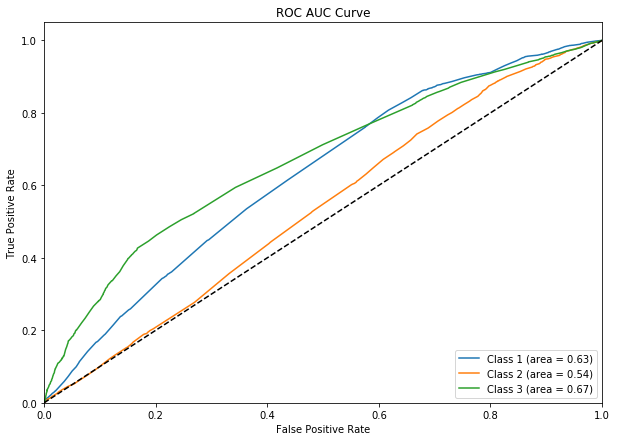

In [22]:
n_classes = len(np.unique(y_train))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i+1, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()


## model 2: KNN default

In [23]:
# Train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)


KNeighborsClassifier()

In [24]:
# Make predictions on the test set
y_pred = knn.predict(X_test_std)
y_pred_proba = knn.predict_proba(X_test_std)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print('Model: KNN')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Model: KNN
Accuracy: 0.3934
Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.50      0.44      4866
           2       0.34      0.43      0.38      4919
           3       0.56      0.25      0.34      4893

    accuracy                           0.39     14678
   macro avg       0.43      0.39      0.39     14678
weighted avg       0.43      0.39      0.39     14678

Confusion Matrix:
[[2445 2037  384]
 [2214 2129  576]
 [1674 2018 1201]]


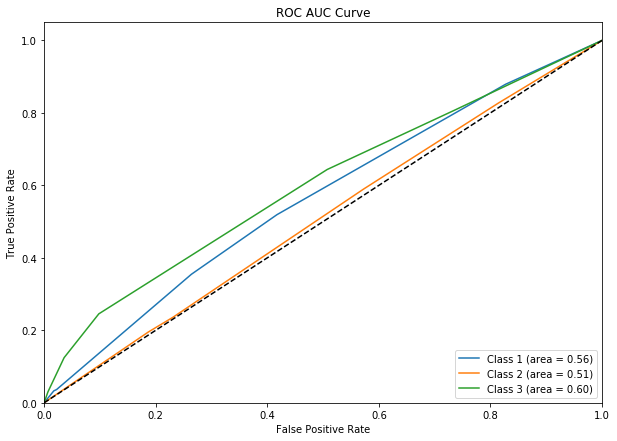

In [25]:
n_classes = len(np.unique(y_train))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i+1, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()


## model 3: KNN k=3

In [26]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
# Make predictions on the test set
y_pred = knn.predict(X_test_std)
y_pred_proba = knn.predict_proba(X_test_std)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print('Model: KNN')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Model: KNN
Accuracy: 0.3819
Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.63      0.46      4866
           2       0.34      0.25      0.29      4919
           3       0.51      0.26      0.35      4893

    accuracy                           0.38     14678
   macro avg       0.41      0.38      0.37     14678
weighted avg       0.41      0.38      0.37     14678

Confusion Matrix:
[[3087 1262  517]
 [2981 1242  696]
 [2489 1128 1276]]


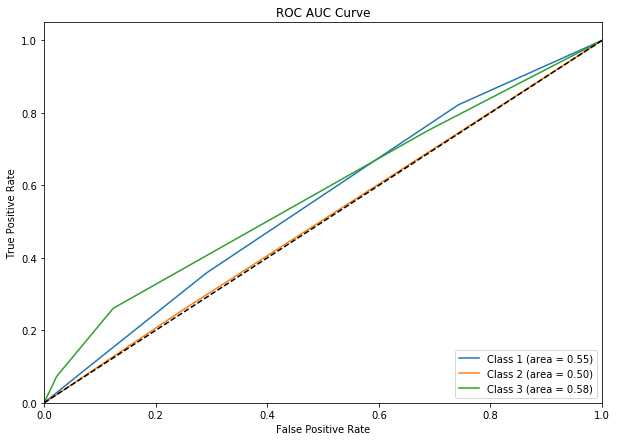

In [28]:
n_classes = len(np.unique(y_train))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i+1, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()


## model 4: LR

In [29]:
# Train the Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_std, y_train)


LogisticRegression(max_iter=1000)

In [30]:
# Make predictions on the test set
y_pred = lr.predict(X_test_std)
y_pred_proba = lr.predict_proba(X_test_std)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print('Model: Logistic Regression')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.4361
Classification Report:
              precision    recall  f1-score   support

           1       0.41      0.61      0.49      4866
           2       0.36      0.26      0.30      4919
           3       0.54      0.44      0.49      4893

    accuracy                           0.44     14678
   macro avg       0.44      0.44      0.43     14678
weighted avg       0.44      0.44      0.43     14678

Confusion Matrix:
[[2954 1168  744]
 [2563 1276 1080]
 [1632 1090 2171]]


In [31]:
# Get the feature importances
importances = np.abs(lr.coef_[0])

# Print the feature importances
print('Feature Importances:')
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.4f}')


Feature Importances:
UNBELTED_OCC_COUNT: 0.3024
ALCOHOL_RELATED: 0.1144
DRUGGED_DRIVER: 0.0905
YOUNG_DRIVER: 0.0675
DISTRACTED: 0.0750
CORE_NETWORK: 0.0592
CRASH_YEAR: 0.0608
MATURE_DRIVER: 0.0631


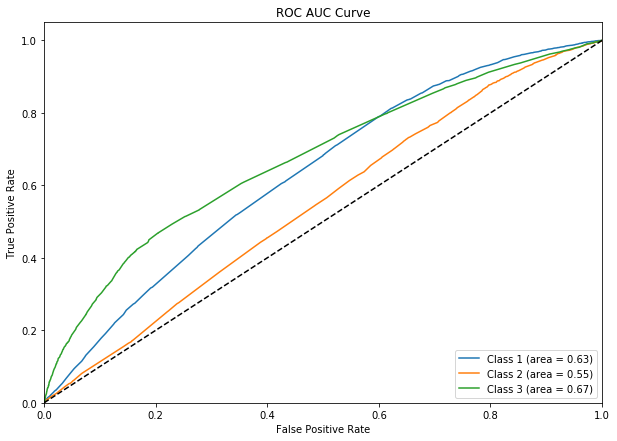

In [32]:
n_classes = len(np.unique(y_train))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i+1, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()


## model 5: SVM

In [33]:
# Train the SVM model
svm = SVC(probability=True)
svm.fit(X_train_std, y_train)


SVC(probability=True)

In [34]:
# Make predictions on the test set
y_pred = svm.predict(X_test_std)
y_pred_proba = svm.predict_proba(X_test_std)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print('Model: Support Vector Machine')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Model: Support Vector Machine
Accuracy: 0.4384
Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.53      0.47      4866
           2       0.36      0.36      0.36      4919
           3       0.56      0.43      0.49      4893

    accuracy                           0.44     14678
   macro avg       0.45      0.44      0.44     14678
weighted avg       0.45      0.44      0.44     14678

Confusion Matrix:
[[2561 1632  673]
 [2144 1752 1023]
 [1318 1453 2122]]


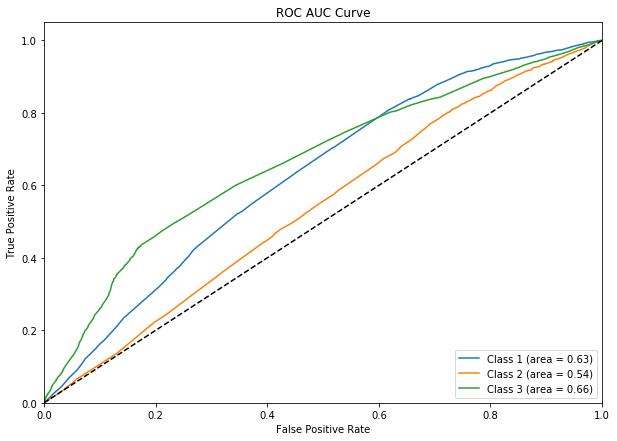

In [35]:
n_classes = len(np.unique(y_train))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i+1, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()


# model 6: random forest

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)


RandomForestClassifier()

In [37]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Model: Random Forest')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


D:\anaconda\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\anaconda\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Model: Random Forest
Accuracy: 0.3923
Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.15      0.22      4866
           2       0.34      0.74      0.47      4919
           3       0.57      0.28      0.38      4893

    accuracy                           0.39     14678
   macro avg       0.45      0.39      0.36     14678
weighted avg       0.45      0.39      0.36     14678

Confusion Matrix:
[[ 738 3785  343]
 [ 597 3637  685]
 [ 376 3134 1383]]


In [38]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

print("Feature importances:")
for i in range(X_train.shape[1]):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")


Feature importances:
1. UNBELTED_OCC_COUNT: 0.4321
2. ALCOHOL_RELATED: 0.2022
3. CRASH_YEAR: 0.1085
4. DRUGGED_DRIVER: 0.0940
5. DISTRACTED: 0.0435
6. CORE_NETWORK: 0.0423
7. YOUNG_DRIVER: 0.0415
8. MATURE_DRIVER: 0.0359


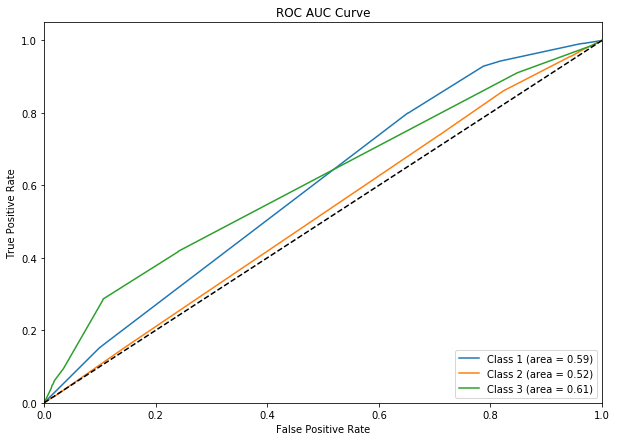

In [41]:
n_classes = len(np.unique(y_train))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i+1, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()


## model 7: decision tree

In [42]:
dt = DecisionTreeClassifier()
dt.fit(X_train_std, y_train)


DecisionTreeClassifier()

In [43]:
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Model: Decision Tree')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Model: Decision Tree
Accuracy: 0.3922
Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.15      0.22      4866
           2       0.34      0.74      0.47      4919
           3       0.57      0.28      0.38      4893

    accuracy                           0.39     14678
   macro avg       0.45      0.39      0.36     14678
weighted avg       0.45      0.39      0.36     14678

Confusion Matrix:
[[ 738 3785  343]
 [ 599 3635  685]
 [ 382 3127 1384]]


D:\anaconda\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\anaconda\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [44]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

print("Feature importances:")
for i in range(X_train.shape[1]):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")


Feature importances:
1. UNBELTED_OCC_COUNT: 0.4952
2. ALCOHOL_RELATED: 0.1907
3. CRASH_YEAR: 0.0755
4. DRUGGED_DRIVER: 0.0607
5. CORE_NETWORK: 0.0514
6. YOUNG_DRIVER: 0.0486
7. DISTRACTED: 0.0414
8. MATURE_DRIVER: 0.0366


## model 8: AdaBoost

In [58]:
ab = AdaBoostClassifier()
ab.fit(X_train_std, y_train)


AdaBoostClassifier()

In [59]:
y_pred = ab.predict(X_test)
y_pred_proba = ab.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Model: AdaBoost')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Model: AdaBoost
Accuracy: 0.6127
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.80      0.67      4852
           3       0.69      0.43      0.53      4934

    accuracy                           0.61      9786
   macro avg       0.63      0.61      0.60      9786
weighted avg       0.63      0.61      0.60      9786

Confusion Matrix:
[[3895  957]
 [2833 2101]]


D:\anaconda\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\anaconda\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [60]:
importances = ab.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

print("Feature importances:")
for i in range(X_train.shape[1]):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")


Feature importances:
1. UNBELTED_OCC_COUNT: 0.5600
2. CRASH_YEAR: 0.1800
3. ALCOHOL_RELATED: 0.0600
4. MATURE_DRIVER: 0.0400
5. CORE_NETWORK: 0.0400
6. DISTRACTED: 0.0400
7. YOUNG_DRIVER: 0.0400
8. DRUGGED_DRIVER: 0.0400


### They are doesn't perform significantly better than our inital trials, but based on classification reports and roc auc curve, we found something interesting. It goes the cases for all models that, class 2, which represent the medium level of severity, is very hard for the models to classify, and the line for it really close to a random guess in roc auc curve.  
  
### So, for the next step, we split the class 2 from the original dataset, and retrain models to let the model only classify the severity level to very severe which is class 3, and not very severe, which is class 1.

In [62]:
# We split the class 2 out and retrain the model
df_sub=df1[df1['MAX_SEVERITY_LEVEL']!=2]

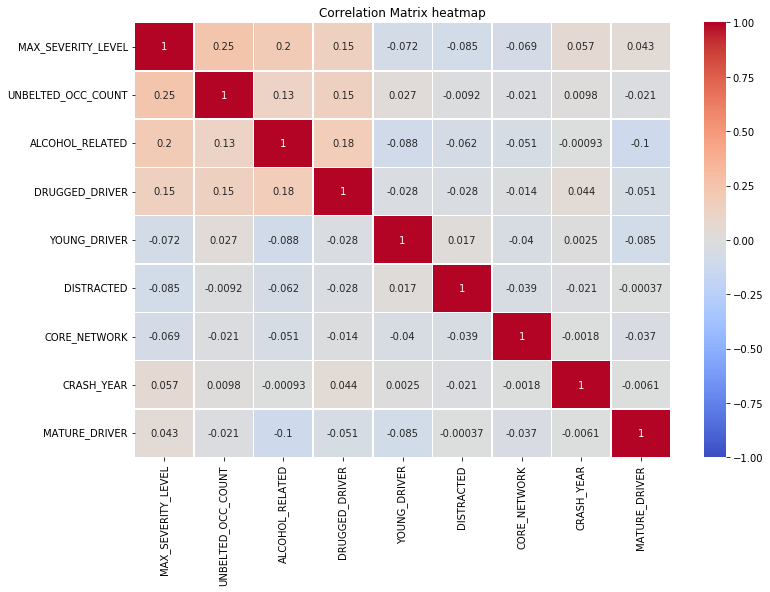

In [63]:
# lets check out this new correlation heatmap again!
corr_matrix = df_sub.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Matrix heatmap")
plt.show()

In [64]:
X = df_sub.drop(columns=['MAX_SEVERITY_LEVEL'])
y = df_sub['MAX_SEVERITY_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and testing data
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [66]:
# Train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_std, y_train)
# Make predictions on the test set
y_pred = gnb.predict(X_test_std)
y_pred_proba = gnb.predict_proba(X_test_std)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print('Model: Gaussian Naive Bayes')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Model: Gaussian Naive Bayes
Accuracy: 0.6417
Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.87      0.71      4852
           3       0.77      0.41      0.54      4934

    accuracy                           0.64      9786
   macro avg       0.68      0.64      0.62      9786
weighted avg       0.68      0.64      0.62      9786

Confusion Matrix:
[[4235  617]
 [2889 2045]]


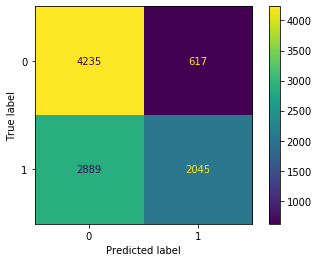

In [67]:
cm_lr = confusion_matrix(y_test,y_pred)
display_cm_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
display_cm_lr.plot();

In [68]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)
# Make predictions on the test set
y_pred = knn.predict(X_test_std)
y_pred_proba = knn.predict_proba(X_test_std)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print('Model: KNN')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Model: KNN
Accuracy: 0.6116
Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.61      0.61      4852
           3       0.62      0.61      0.61      4934

    accuracy                           0.61      9786
   macro avg       0.61      0.61      0.61      9786
weighted avg       0.61      0.61      0.61      9786

Confusion Matrix:
[[2956 1896]
 [1905 3029]]


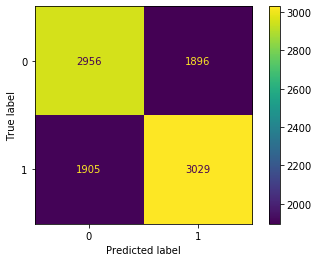

In [69]:
cm_lr = confusion_matrix(y_test,y_pred)
display_cm_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
display_cm_lr.plot();

In [70]:
# Train the Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_std, y_train)
# Make predictions on the test set
y_pred = lr.predict(X_test_std)
y_pred_proba = lr.predict_proba(X_test_std)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print('Model: Logistic Regression')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.6528
Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.81      0.70      4852
           3       0.73      0.50      0.59      4934

    accuracy                           0.65      9786
   macro avg       0.67      0.65      0.64      9786
weighted avg       0.67      0.65      0.64      9786

Confusion Matrix:
[[3933  919]
 [2479 2455]]


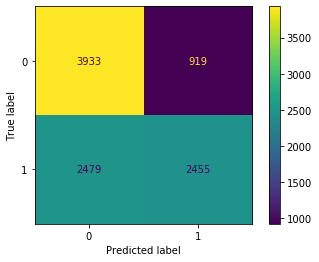

In [71]:
cm_lr = confusion_matrix(y_test,y_pred)
display_cm_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
display_cm_lr.plot();

In [72]:
ab = AdaBoostClassifier()
ab.fit(X_train_std, y_train)
y_pred = ab.predict(X_test)
y_pred_proba = ab.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Model: AdaBoost')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Model: AdaBoost
Accuracy: 0.6127
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.80      0.67      4852
           3       0.69      0.43      0.53      4934

    accuracy                           0.61      9786
   macro avg       0.63      0.61      0.60      9786
weighted avg       0.63      0.61      0.60      9786

Confusion Matrix:
[[3895  957]
 [2833 2101]]


D:\anaconda\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\anaconda\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


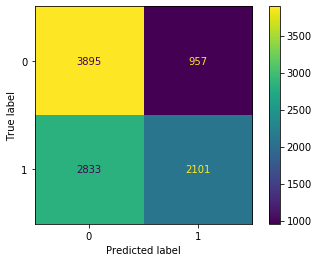

In [73]:
cm_lr = confusion_matrix(y_test,y_pred)
display_cm_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
display_cm_lr.plot();

In [74]:
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Model: Random Forest')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Model: Random Forest
Accuracy: 0.6126
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.80      0.67      4852
           3       0.69      0.43      0.53      4934

    accuracy                           0.61      9786
   macro avg       0.63      0.61      0.60      9786
weighted avg       0.63      0.61      0.60      9786

Confusion Matrix:
[[3895  957]
 [2834 2100]]


D:\anaconda\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\anaconda\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


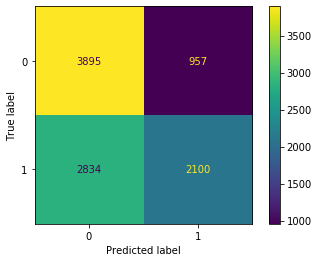

In [75]:
cm_lr = confusion_matrix(y_test,y_pred)
display_cm_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
display_cm_lr.plot();

## Result and conclusion
  
### Now, after modifying our feature, we now have generally higher accuracy from the begining of this question. In genral, LR and Gaussian NB performce better among all models. They have a accuracy of around 0.65. Both model do a better job with class 1 instead of class3, but in genral relatively balanced. This is a significant increase comparing to our baseline model in the beginning of this question.

  
### Referring back to our inital question, the max severity level is indicating the severity of our accident. We cannot directly assume there is a causality between our input variable and target variable, however, based on our feature importance in the early models and correlation heatmap, we noticed that the severity has strong correlation coef with using drug or not, drink alcohol or not and have seatbelt on or not. This tells us avoiding those behavior might to some point lower the accident level. Among all the 8 models we tried, the LR and Gaussian Naive Bayes model works best after data modification. Both reach a 0.65 accuracy which is a significant increase comparing to baseline model. Also, we noticed that SVM takes longger running time which involves much calculation. In the future we can try other feature engineering and more models to increase this performance, because it is still not good enough.

## Future work
### First, we can do more feature engineeing, like combining two columns, like mature and young to have a special age group involved driver. Secondly, we can increase our data size and gain more features, since those variables are limited considering our limited time and limited calcualtion hardware. We only picked 70000 data from the huge original dataset, so this can be further be improved. Finally, we can try more models to find more potential better models for this classification task.

### Reference
1. Midterm
2. https://scikit-learn.org/stable/modules/svm.html
3. https://towardsdatascience.com/feature-engineering-in-python-part-i-the-most-powerful-way-of-dealing-with-data-8e2447e7c69e
4. https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47